<a href="https://colab.research.google.com/github/vik-ahlawat/Data_Science-/blob/main/Lecture_5_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lec 5: Pandas

# Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with tabular data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

## Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* Numpy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (.dropna(), pd.isnull())
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration

## Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

## Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

## Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |

## Getting Started

[Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a link to the documentation for DataFrames

In [ ]:
import pandas as pd
import numpy as np
endstring = '\n' + '-'*50 + '\n'

# Pandas Series
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series:
```s = pd.Series(data, index = index) ```
- `data` can be many things:
    * An ndarray (or regular Python list)
    * A Python Dictionary
    * A scalar
- The passed `index` is a list of axis labels (which varies on what data is). Default index is (0, 1, 2, …) if not provided.

Think "Series = Vector + Labels"

In [ ]:
first_series = pd.Series([1, 2, 3, 8, 16, 32, 64])
print(type(first_series), end=endstring)
print(first_series)

<class 'pandas.core.series.Series'>
--------------------------------------------------
0     1
1     2
2     3
3     8
4    16
5    32
6    64
dtype: int64


In [ ]:
first_series

,0
0,1
1,2
2,3
3,8
4,16
5,32
6,64


In [ ]:
first_series[2]

np.int64(3)

In [ ]:
second_series = pd.Series([1, 2, 3, 8, 16, 32, 64], index=[2, 1, 0, 3, 4, 5, 6])
print(type(second_series), end=endstring)
print(second_series)

<class 'pandas.core.series.Series'>
--------------------------------------------------
2     1
1     2
0     3
3     8
4    16
5    32
6    64
dtype: int64


In [ ]:
second_series

,0
2,1
1,2
0,3
3,8
4,16
5,32
6,64


In [ ]:
second_series[2]  # indexing by label

np.int64(1)

In [ ]:
second_series.iloc[2]  # indexing by position

np.int64(3)

In [ ]:
# index label can be reused
s = pd.Series(np.random.randn(5), index=["a", "a", "c", "d", "e"])
print(s, end=endstring)
print(s.index, end=endstring)
s["a"]

a    0.734272
a    0.849200
c    0.699357
d    1.581009
e    0.557922
dtype: float64
--------------------------------------------------
Index(['a', 'a', 'c', 'd', 'e'], dtype='object')
--------------------------------------------------


,0
a,0.734272
a,0.849200


In [ ]:
s["e"]

np.float64(0.5579221491752844)

In [ ]:
s.iloc[4]

np.float64(0.5579221491752844)

If Data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the corresponding keys of the dict

In [ ]:
d = {"x": 1, 'y': 2, "z": 3}
a = pd.Series(d)
print(a)

x    1
y    2
z    3
dtype: int64


In [ ]:
a['x'] == d['x']

np.True_

You can create a series from a scalar, but need to specify indices

In [ ]:
s = pd.Series(5, index=np.arange(7))
print(s)

0    5
1    5
2    5
3    5
4    5
5    5
6    5
dtype: int64


You can slice series like you would numpy arrays/python lists

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)

a    0.668496
b   -0.120958
c   -0.551238
d    0.027990
e   -0.668129
dtype: float64


In [ ]:
s['a':'c']

,0
a,0.668496
b,-0.120958
c,-0.551238


In [ ]:
# slicing the first three entries
print(s.iloc[:3])

a    0.668496
b   -0.120958
c   -0.551238
dtype: float64


In [ ]:
# conditional indexing
print(s > 0.5)

a     True
b    False
c    False
d    False
e    False
dtype: bool


In [ ]:
# conditional indexing - index with booleans
print(s[s > 0.5])

a    0.668496
dtype: float64


In [ ]:
# elementwise function - vectorization
print(np.exp(s))

a    1.951300
b    0.886071
c    0.576236
d    1.028385
e    0.512667
dtype: float64


In [ ]:
print(s+s)

a    1.336991
b   -0.241917
c   -1.102477
d    0.055980
e   -1.336259
dtype: float64


Series Attributes and Iteration:

- Get the index :
```python
s.index ```
- Get the values :
``` python
s.values ```
- Find the shape :``` python s.shape ```

In [ ]:
for data_pair in s.items():
    (idx, val) = data_pair  # (idx, val)
    print(idx, " -> ", val)
    print("-" * 25)

a  ->  0.668495663021204
-------------------------
b  ->  -0.12095832637055141
-------------------------
c  ->  -0.5512383521232965
-------------------------
d  ->  0.027990017594428387
-------------------------
e  ->  -0.6681293778579628
-------------------------


Sort by index or by value

In [ ]:
s

,0
a,0.668496
b,-0.120958
c,-0.551238
d,0.027990
e,-0.668129


In [ ]:
print(s.sort_index(), end=endstring)

a    0.668496
b   -0.120958
c   -0.551238
d    0.027990
e   -0.668129
dtype: float64
--------------------------------------------------


In [ ]:
print(s.sort_values(), end=endstring)

e   -0.668129
c   -0.551238
b   -0.120958
d    0.027990
a    0.668496
dtype: float64
--------------------------------------------------


In [ ]:
print(s.sort_values(ascending=False), end=endstring)

a    0.668496
d    0.027990
b   -0.120958
c   -0.551238
e   -0.668129
dtype: float64
--------------------------------------------------


Find counts of unique values

In [ ]:
s = pd.Series([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])
print(s, end=endstring)

sct = s.value_counts()
print(sct)

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    2
dtype: int64
--------------------------------------------------
2    4
0    3
1    3
Name: count, dtype: int64


In [ ]:
# Convinient API for Counter
from collections import Counter

x = Counter(
    [
        0,
        0,
        0,
        1,
        1,
        1,
        2,
        2,
        2,
        2,
        3,
        2,
        3,
        3,
        3,
    ]
)

In [ ]:
x

Counter({0: 3, 1: 3, 2: 5, 3: 4})

In [ ]:
type(x)

collections.Counter

You can do just about anything you can do with a numpy array

- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [ ]:
s

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,2
7,2
8,2
9,2


In [ ]:
print(f'The minimum value of s is {s.min()}.')
print(f'The mean value of s is {s.mean()}.')

The minimum value of s is 0.
The mean value of s is 1.1.


## Exercise (post-lecture)

- Consider the series `s` of letters in a sentence.
- What is count of each alphabetical letter in the sentence, output a series which is sorted by the count
- Create a list with only the top 5 common letters (not including space)  

HINT:   
1. `s.str.isalpha()` to check if a pd.series data is alphabetical  
2. `s.sort_values(ascending = False)` to sort value from largest to smallest

In [ ]:
"Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the indexeeeeeee."


In [ ]:
# list(
#         "Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the indexeeeeeee."
#     )

In [ ]:
s = pd.Series(
    list(
        "Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the indexeeeeeee."
    )
)

In [ ]:
s.shape

In [ ]:
 s[s.str.isalpha()].value_counts().sort_values(ascending=False).iloc[:5]



In [ ]:
# # My Answer
# get conditional indexing
# get value counts
# sort by counts (values)
isAlpha = s.str.isalpha()
sAlpha = s[isAlpha]
sAlpha.value_counts().sort_values(ascending=False)[:5]

# Pandas DataFrame
- [**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
 is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df.
- If you do not pass anything in, the input will be constructed by "common sense" rules

## DataFrame Creation from dictonary of series / ndarrays / lists
One can create a dataframe from a dictionary of series
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series.
- If no columns are passed, the columns will be the sorted list of dict keys.
- The series don't need to be the same length.

In [ ]:
# Create a dictionary of series
# Columns are dictionary keys, indices and values obtained from series
a_series = pd.Series([1, 2, 3], index=["a", "b", "c"])
b_series = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"])
a_series, b_series

(a    1
 b    2
 c    3
 dtype: int64,
 a    0
 b    1
 c    2
 d    3
 dtype: int64)

In [ ]:
d = {"one": a_series, "two": b_series}
df = pd.DataFrame(d)
# Note: pandas use NaN to fill in the missing value in series
# and convert all elements to floating type
df

,one,two
a,1.0,0
b,2.0,1
c,3.0,2
d,NaN,3


If creating a dataframe from dictionary of ndarray / lists
- The ndarrays / lists must all be the same length.
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [ ]:
type(np.array([1,2]))

numpy.ndarray

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Create a dictionary of series with varying lengths
data = {
    'A': np.array([1, 2, 3]),
    'B': np.array([4, 5, 6, 7]),
    'C': np.array([8, 9])
}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(data)

print(df)

ValueError: All arrays must be of the same length

In [ ]:
data = {
    'A': np.array([1, 2, 3, 0]),
    'B': np.array([4, 5, 6, 7]),
    'C': np.array([8, 9, np.nan, np.nan])
}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(data)

print(df)

   A  B    C
0  1  4  8.0
1  2  5  9.0
2  3  6  NaN
3  0  7  NaN


## DataFrame Creation from a list of dictionaries

In [ ]:
data = []
for i in range(10):
    data += [{"Column" + str(j): np.random.randint(100) for j in range(5)}]
    # dictionary comprehension!
data

[{'Column0': 67, 'Column1': 30, 'Column2': 45, 'Column3': 48, 'Column4': 93},
 {'Column0': 44, 'Column1': 84, 'Column2': 95, 'Column3': 42, 'Column4': 70},
 {'Column0': 54, 'Column1': 94, 'Column2': 45, 'Column3': 25, 'Column4': 54},
 {'Column0': 54, 'Column1': 25, 'Column2': 34, 'Column3': 55, 'Column4': 51},
 {'Column0': 93, 'Column1': 42, 'Column2': 40, 'Column3': 85, 'Column4': 72},
 {'Column0': 89, 'Column1': 21, 'Column2': 61, 'Column3': 42, 'Column4': 95},
 {'Column0': 49, 'Column1': 3, 'Column2': 6, 'Column3': 50, 'Column4': 56},
 {'Column0': 7, 'Column1': 98, 'Column2': 64, 'Column3': 94, 'Column4': 60},
 {'Column0': 24, 'Column1': 7, 'Column2': 22, 'Column3': 78, 'Column4': 57},
 {'Column0': 71, 'Column1': 83, 'Column2': 51, 'Column3': 58, 'Column4': 62}]

In [ ]:
# Creation from a list of dicts
df = pd.DataFrame(data)
print(df)

   Column0  Column1  Column2  Column3  Column4
0       67       30       45       48       93
1       44       84       95       42       70
2       54       94       45       25       54
3       54       25       34       55       51
4       93       42       40       85       72
5       89       21       61       42       95
6       49        3        6       50       56
7        7       98       64       94       60
8       24        7       22       78       57
9       71       83       51       58       62


array([[<Axes: title={'center': 'Column4'}>]], dtype=object)

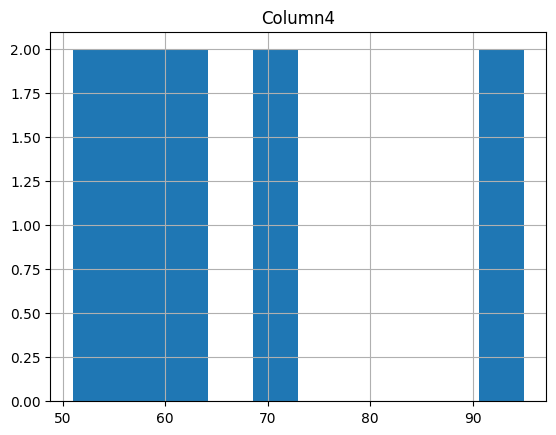

In [ ]:
df.hist("Column4")

<Axes: >

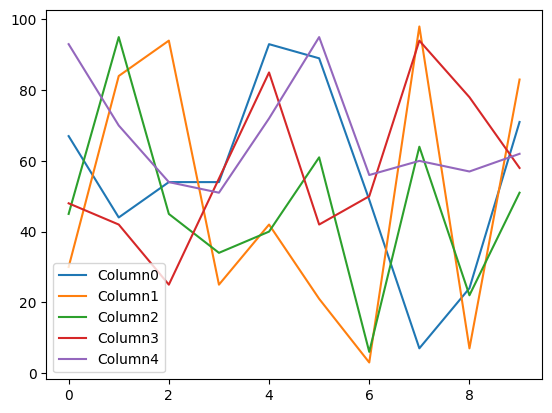

In [ ]:
df.plot()

<Axes: xlabel='Column0', ylabel='Column1'>

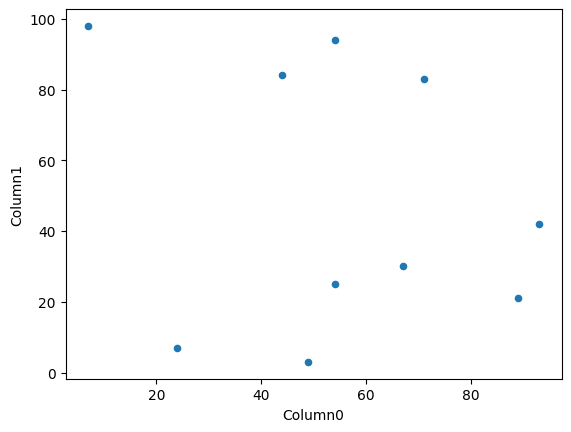

In [ ]:
df.plot.scatter(x= 'Column0', y='Column1')

In [ ]:
# Extract certain columns
df = pd.DataFrame(data, columns=["Column0", "Column1"])
df

,Column0,Column1
0,67,30
1,44,84
2,54,94
3,54,25
4,93,42
5,89,21
6,49,3
7,7,98
8,24,7
9,71,83


In [ ]:
df.head()  # print the first few rows, default = 5

,Column0,Column1
0,67,30
1,44,84
2,54,94
3,54,25
4,93,42


## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

In [ ]:
list(df.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
df.columns

Index(['Column0', 'Column1'], dtype='object')

In [ ]:
df.shape

(10, 2)

In [ ]:
df.values

array([[67, 30],
       [44, 84],
       [54, 94],
       [54, 25],
       [93, 42],
       [89, 21],
       [49,  3],
       [ 7, 98],
       [24,  7],
       [71, 83]])

In [ ]:
# Adding and accessing columns
d = {
    "one": pd.Series([1, 2, 3], index=["a", "b", "c"]),
    "two": pd.Series(range(4), index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,0
b,2.0,1
c,3.0,2
d,NaN,3


In [ ]:
# math operation, like how we create data in the dictionary
df["three"] = df["one"] * df["two"]
df

,one,two,three
a,1.0,0,0.0
b,2.0,1,2.0
c,3.0,2,6.0
d,NaN,3,NaN


In [ ]:
# # Create a boolean flag column
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,0,0.0,False
b,2.0,1,2.0,False
c,3.0,2,6.0,True
d,NaN,3,NaN,False


In [ ]:
# # Create a const column
df["const"] = "const_value"

df

,one,two,three,flag,const
a,1.0,0,0.0,False,const_value
b,2.0,1,2.0,False,const_value
c,3.0,2,6.0,True,const_value
d,NaN,3,NaN,False,const_value


In [ ]:
# inserting column in specified location index, with values
# insert at index 1, column named 'bar', with data df['two']
df.insert(loc = 2,
          column = "bar",
          value = df["two"]*100)
df

,one,two,bar,three,flag,const
a,1.0,0,0,0.0,False,const_value
b,2.0,1,100,2.0,False,const_value
c,3.0,2,200,6.0,True,const_value
d,NaN,3,300,NaN,False,const_value


In [ ]:
# Deleting Columns and return the deleted columns
# .pop()
three = df.pop("three")
df

,one,two,bar,flag,const
a,1.0,0,0,False,const_value
b,2.0,1,100,False,const_value
c,3.0,2,200,True,const_value
d,NaN,3,300,False,const_value


In [ ]:
three

,three
a,0.0
b,2.0
c,6.0
d,NaN


## Indexing and Selection

- 3 methods ``` [],  iloc, loc ```

| Operation  | Syntax       | Result |
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  |
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Selecting Cols form Of Indexing: []
- Series: selecting a label: s[label]
- DataFrame: selection single or multiple columns:
``` python
df['col'] or df[['col1', 'col2']] ```
- DataFrame: slicing the rows:
``` python
df['rowlabel1': 'rowlabel2'] ```
or
``` python
df[boolean_mask] ```

In [ ]:
# Lets create a data frame
dates = pd.date_range("1/1/2000", periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2000-01-01,0.485710,-0.451136,1.152124,0.571312
2000-01-02,1.499973,0.502466,-0.218479,0.480424
2000-01-03,0.110054,0.727082,-0.376481,0.516233
2000-01-04,-0.588976,0.789724,0.363953,-1.754111
2000-01-05,0.656899,-0.738102,-0.270096,-0.804242
2000-01-06,0.133443,0.848295,0.301468,-0.607469
2000-01-07,0.414856,1.602756,0.440404,-1.476856
2000-01-08,-0.815120,0.871033,-0.696612,0.248175


In [ ]:
# column  'A'
df["A"]

,A
2000-01-01,0.485710
2000-01-02,1.499973
2000-01-03,0.110054
2000-01-04,-0.588976
2000-01-05,0.656899
2000-01-06,0.133443
2000-01-07,0.414856
2000-01-08,-0.815120


In [ ]:
### You can also access a column by df.colname
df.A  # same as df['A']

,A
2000-01-01,0.485710
2000-01-02,1.499973
2000-01-03,0.110054
2000-01-04,-0.588976
2000-01-05,0.656899
2000-01-06,0.133443
2000-01-07,0.414856
2000-01-08,-0.815120


In [ ]:
# multiple columns
df[["A", "B"]]

,A,B
2000-01-01,0.485710,-0.451136
2000-01-02,1.499973,0.502466
2000-01-03,0.110054,0.727082
2000-01-04,-0.588976,0.789724
2000-01-05,0.656899,-0.738102
2000-01-06,0.133443,0.848295
2000-01-07,0.414856,1.602756
2000-01-08,-0.815120,0.871033


In [ ]:
df["A"] > df["B"]

,0
2000-01-01,True
2000-01-02,True
2000-01-03,False
2000-01-04,False
2000-01-05,True
2000-01-06,False
2000-01-07,False
2000-01-08,False


In [ ]:
# boolean mask
df[df["A"] > df["B"]]

,A,B,C,D
2000-01-01,0.485710,-0.451136,1.152124,0.571312
2000-01-02,1.499973,0.502466,-0.218479,0.480424
2000-01-05,0.656899,-0.738102,-0.270096,-0.804242


## Selecting rows by label .loc (Recommend)

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label
    2. A list of labels
    3. A boolean array

In [ ]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 10)

In [ ]:
df

,A,B,C,D
2000-01-01,0.485710,-0.451136,1.152124,0.571312
2000-01-02,1.499973,0.502466,-0.218479,0.480424
2000-01-03,0.110054,0.727082,-0.376481,0.516233
2000-01-04,-0.588976,0.789724,0.363953,-1.754111
2000-01-05,0.656899,-0.738102,-0.270096,-0.804242
2000-01-06,0.133443,0.848295,0.301468,-0.607469
2000-01-07,0.414856,1.602756,0.440404,-1.476856
2000-01-08,-0.815120,0.871033,-0.696612,0.248175


In [ ]:
## Selection by label .loc
df.loc["2000-01-01"]

,2000-01-01
A,0.485710
B,-0.451136
C,1.152124
D,0.571312


In [ ]:
## Selection by label .loc
df.loc["2000-01-01", "A"]

np.float64(0.48570955093473045)

In [ ]:
# similar to numpy slicing by using labels
df.loc["2000-01-01":"2000-01-03", "A":"C"]

,A,B,C
2000-01-01,0.485710,-0.451136,1.152124
2000-01-02,1.499973,0.502466,-0.218479
2000-01-03,0.110054,0.727082,-0.376481


In [ ]:
df.loc["2000-01-01"] > 0

,2000-01-01
A,True
B,False
C,True
D,True


In [ ]:
# Get columns for which value is greater than 0 on certain day, get all rows
df.loc[:, df.loc["2000-01-01"] > 0]

,A,C,D
2000-01-01,0.485710,1.152124,0.571312
2000-01-02,1.499973,-0.218479,0.480424
2000-01-03,0.110054,-0.376481,0.516233
2000-01-04,-0.588976,0.363953,-1.754111
2000-01-05,0.656899,-0.270096,-0.804242
2000-01-06,0.133443,0.301468,-0.607469
2000-01-07,0.414856,0.440404,-1.476856
2000-01-08,-0.815120,-0.696612,0.248175


## Selecting rows by position

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice
    - A boolean array

In [ ]:
df1 = pd.DataFrame(
    np.random.randn(6, 4),
    index=list(range(0, 12, 2)),
    columns=list(range(0, 12, 3))
)

df1

,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602
6,-1.180080,0.818496,0.397737,0.632954
8,0.361847,-1.214704,-1.494256,0.319737
10,0.451904,-0.500430,0.492332,-0.140968


In [ ]:
# rows index 0 2 4 6
df1.loc[[0, 2, 4, 6]]

,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602
6,-1.180080,0.818496,0.397737,0.632954


In [ ]:
# rows position 0 1 2 3
df1.iloc[:4]

,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602
6,-1.180080,0.818496,0.397737,0.632954


In [ ]:
# df.loc(): Note that contrary to usual python slices, both the
# start and the stop are included
df1.loc[0:4]

,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602


In [ ]:
# rows 1:5  and columns 2 : 4
# rows position 1,2,3,4 and columns positions 2,3
df1.iloc[1:5, 2:4]

,6,9
2,0.938267,-0.189825
4,0.633677,-0.032602
6,0.397737,0.632954
8,-1.494256,0.319737


In [ ]:
# select via integer list
df1.iloc[[1, 3, 5], [1, 3]]

,3,9
2,1.069970,-0.189825
6,0.818496,0.632954
10,-0.500430,-0.140968


In [ ]:
df1

,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602
6,-1.180080,0.818496,0.397737,0.632954
8,0.361847,-1.214704,-1.494256,0.319737
10,0.451904,-0.500430,0.492332,-0.140968


In [ ]:
df1.iloc[:, 1]

,3
0,0.243551
2,1.069970
4,1.561019
6,0.818496
8,-1.214704
10,-0.500430


In [ ]:
# selecting via integer mask
boolean_mask = df1.iloc[:, 1] > 0
print(boolean_mask.values)

df1.iloc[boolean_mask.values, :]

[ True  True  True  True False False]


,0,3,6,9
0,-0.442066,0.243551,1.970953,0.965509
2,-0.130088,1.069970,0.938267,-0.189825
4,-0.880812,1.561019,0.633677,-0.032602
6,-1.180080,0.818496,0.397737,0.632954


### Exercise (post-lecture)

Given the dataframe, find the following
- Last two rows of columns A and D
- Last three rows such which statisfy that column A > Column B

In [ ]:
dates = pd.date_range("1/1/2000", periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=["A", "B", "C", "D"])
df

In [ ]:

#@title Solution
# # Answer
# df[['A','D']].iloc[-2:]
# boolean_mask = df["A"] > df["B"]
# print(boolean_mask)
# df[boolean_mask].iloc[-3:]
#

# Merging DataFrames

- Pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects:
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True) ```


The sequence of operations in a basic call to `pd.merge()` is:

1. Check all columns in `left` and `right`. Let S be the set of columns which are present in both
2. For every row of `left`, check if it has a corresponding row in `right` with the same values among the columns in S.
3. If two matching rows are found, merge the rows together in the natural way.

The `how` parameter determines how Pandas will deal with the rows that don't match.

In [ ]:
# Example of merge
left = pd.DataFrame({"key": ['06510910', '06510911','06510912'], "lname": ['benson','nikki','pop']})
right = pd.DataFrame({"key": ['06510910', '06510911','06510913'], "rval_score": [60, 80, 90]})

print("left df: ", left, "right df: ", right, sep=endstring)

left df: 
--------------------------------------------------
        key   lname
0  06510910  benson
1  06510911   nikki
2  06510912     pop
--------------------------------------------------
right df: 
--------------------------------------------------
        key  rval_score
0  06510910          60
1  06510911          80
2  06510913          90


In [ ]:
merged = pd.merge(left, right, on=["key"], how="inner")
print(merged)
# inner ignores all rows in left which don't have a match in right (and vice versa)

        key   lname  rval_score
0  06510910  benson          60
1  06510911   nikki          80


In [ ]:
merged = pd.merge(left, right, on=["key"], how="outer")
print(merged)
# outer keeps all rows which don't have a match, filling missing entries with NaN

        key   lname  rval_score
0  06510910  benson        60.0
1  06510911   nikki        80.0
2  06510912     pop         NaN
3  06510913     NaN        90.0


In [ ]:
merged = pd.merge(left, right, on=["key"], how="left")
print(merged)
# left keeps all rows in `left` if they don't have a match, but ignores rows in right if they don't match

        key   lname  rval_score
0  06510910  benson        60.0
1  06510911   nikki        80.0
2  06510912     pop         NaN


In [ ]:
merged = pd.merge(left, right, on=["key"], how="right")
print(merged)
# right does the same thing as left but on the `right` df

        key   lname  rval_score
0  06510910  benson          60
1  06510911   nikki          80
2  06510913     NaN          90


`on_left` and `on_right` lets us merge based on columns which have different names in `left` and `right` (they need to be of the same type though)

## Execrise (Post Lecture)
Take a guess what would be the output here, and run the cell to validate your guess.

In [ ]:
left = pd.DataFrame({"key": ["test", "test"], "lval": [4, 2]})
print(left, end=endstring)
right = pd.DataFrame({"key": ["test", "test"], "rval": [4, 5]})
print(right, end=endstring)
# gives all pairs of rows

In [ ]:
print(pd.merge(left, right, on=["key"]))

# Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python
df.apply(func, axis = 0)
```
- apply() is used to apply a function along an axis of the DataFrame or on values of Series.
- applymap() is used to apply a function to a DataFrame elementwise.
- map() is used to substitute each value in a Series with another value.

In [ ]:
## APPLY EXAMPLES
df1 = pd.DataFrame(
    np.ones([6, 4]) * np.array([1, 2, 3, 4]),
    index=list(range(0, 12, 2)),
    columns=list("abcd"),
)
df1

,a,b,c,d
0,1.0,2.0,3.0,4.0
2,1.0,2.0,3.0,4.0
4,1.0,2.0,3.0,4.0
6,1.0,2.0,3.0,4.0
8,1.0,2.0,3.0,4.0
10,1.0,2.0,3.0,4.0


In [ ]:
df1.sum(axis = 1)

,0
0,10.0
2,10.0
4,10.0
6,10.0
8,10.0
10,10.0


In [ ]:
df1.sum(axis = 0)

,0
a,6.0
b,12.0
c,18.0
d,24.0


In [ ]:
def normalize(x):
    # 1 x 4
    return (x - x.mean())/x.std()

In [ ]:
# Apply to each row
df1.apply(normalize, axis=1)

,a,b,c,d
0,-1.161895,-0.387298,0.387298,1.161895
2,-1.161895,-0.387298,0.387298,1.161895
4,-1.161895,-0.387298,0.387298,1.161895
6,-1.161895,-0.387298,0.387298,1.161895
8,-1.161895,-0.387298,0.387298,1.161895
10,-1.161895,-0.387298,0.387298,1.161895


### Side note: lambda(anonymous) functions

lambda functions allow you to specify a function without giving it a separate declaration.  For example, the function
```python
lambda x: (x - x.mean())/x.std()
```
is equivalent to the function
```python
def normalize(x):
    return (x - x.mean())/x.std()
```
You'll often see lambda functions used in list comprehensions, or in methods (like `map()`, `apply()`, or `applymap()`) that take a function as input.

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Apply to each row
df1.apply(normalize, axis=1)

,a,b,c,d
0,-1.161895,-0.387298,0.387298,1.161895
2,-1.161895,-0.387298,0.387298,1.161895
4,-1.161895,-0.387298,0.387298,1.161895
6,-1.161895,-0.387298,0.387298,1.161895
8,-1.161895,-0.387298,0.387298,1.161895
10,-1.161895,-0.387298,0.387298,1.161895


In [ ]:
df1.apply(lambda x: (x - x.mean())/x.std(), axis=1)

,a,b,c,d
0,-1.161895,-0.387298,0.387298,1.161895
2,-1.161895,-0.387298,0.387298,1.161895
4,-1.161895,-0.387298,0.387298,1.161895
6,-1.161895,-0.387298,0.387298,1.161895
8,-1.161895,-0.387298,0.387298,1.161895
10,-1.161895,-0.387298,0.387298,1.161895


In [ ]:
df1

,a,b,c,d
0,1.0,2.0,3.0,4.0
2,1.0,2.0,3.0,4.0
4,1.0,2.0,3.0,4.0
6,1.0,2.0,3.0,4.0
8,1.0,2.0,3.0,4.0
10,1.0,2.0,3.0,4.0


In [ ]:
def add_sum(x):
    return x + x.sum()

df1.apply(add_sum, axis=0)

,a,b,c,d
0,7.0,14.0,21.0,28.0
2,7.0,14.0,21.0,28.0
4,7.0,14.0,21.0,28.0
6,7.0,14.0,21.0,28.0
8,7.0,14.0,21.0,28.0
10,7.0,14.0,21.0,28.0


In [ ]:
# # Use lambda functions  to normalize columns
df1.apply(lambda x: x + x.sum(), axis=0)

,a,b,c,d
0,7.0,14.0,21.0,28.0
2,7.0,14.0,21.0,28.0
4,7.0,14.0,21.0,28.0
6,7.0,14.0,21.0,28.0
8,7.0,14.0,21.0,28.0
10,7.0,14.0,21.0,28.0


In [ ]:
l1 = [-1, 2, 3, 4, 5, 62, 8, 1, -1]
l2 = [(1, 2), (3, 4), (-1, 4), (4, 6), (10, 1)]

In [ ]:
sorted(l1)

[-1, -1, 1, 2, 3, 4, 5, 8, 62]

In [ ]:
sorted(l2, key=lambda x: x[0])

[(-1, 4), (1, 2), (3, 4), (4, 6), (10, 1)]

In [ ]:
sorted(l2, key=lambda x: x[1])

[(10, 1), (1, 2), (3, 4), (-1, 4), (4, 6)]

## Execrise: (Post-Lecture)
Say I wanted to find where the maximum dates occured for each column of the df. How can we do that?  
HINT: `.idxmax()` function for `pd.Series`

In [ ]:
## APPLY EXAMPLES CONT
# Create DF with 1000 rows and 3 columns filled with random entries
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)

tsdf

In [ ]:
#@title Solution
# tsdf.apply(lambda x: x.idxmax())

# I/O Functions

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ```
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](https://pandas.pydata.org/pandas-docs/stable/io.html)

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [ ]:
import pandas as pd

# Can use df.info to find out information about the df
iris_data = pd.read_csv(
    "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# iris_data = pd.read_csv('./data/iris.csv')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# describe and stats summarize the dataframe
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# for info
iris_data.to_csv("example_df.csv")

## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby([key1, key2]) ```


- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results

![image](https://i.stack.imgur.com/sgCn1.jpg)

In [ ]:
df = pd.DataFrame(
    {
        "key": ["A", "B", "C", "A", "B", "C", "A", "B", "C"],
        "data": [0, 5, 10, 5, 10, 15, 10, 15, 20],
    }
)
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [ ]:
g = df.groupby("key")
g

In [ ]:
g.agg(["min"])

,data
,min
key,
A,0
B,5
C,10


In [ ]:
g.agg(["max", "sum"])

data    
     max sum
key         
A     10  15
B     15  30
C     20  45

In [ ]:
sums = df.groupby("key").agg(["min", "max", "sum"])
sums

data        
     min max sum
key             
A      0  10  15
B      5  15  30
C     10  20  45

In [ ]:
customize = df.groupby("key").apply(lambda x: x.sum() + 0.1)
customize

,data
key,
A,15.1
B,30.1
C,45.1


# Plotting data : [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

- The plot method on Series and DataFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Autocorrelation
    - Bootstrap Plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


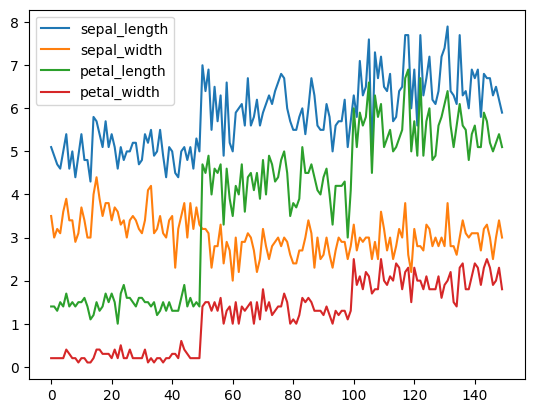

In [ ]:
iris_data.plot();  # plot all the numeric data

                    A          B         C          D
2000-01-01   0.236734   0.347571 -0.202878  -1.054283
2000-01-02  -0.278880  -0.008909  0.694875  -0.891970
2000-01-03  -2.390812  -0.577829  0.004554  -0.218832
2000-01-04  -2.829480  -0.264750 -0.278985   1.039298
2000-01-05  -4.964358   1.059598 -2.556747   1.593134
...               ...        ...       ...        ...
2002-09-22  10.140411  19.787670 -0.856714  96.934089
2002-09-23  10.125712  20.387506 -0.964667  96.556283
2002-09-24   9.096225  21.617510 -1.670750  96.558374
2002-09-25   7.603717  21.197192 -1.863526  96.708049
2002-09-26   6.897369  23.180670 -0.669483  97.863194

[1000 rows x 4 columns]


<Axes: >

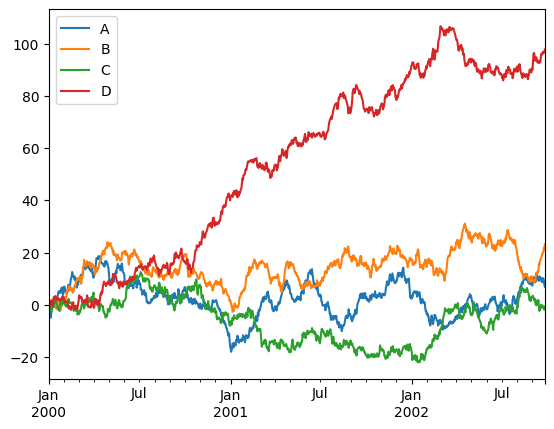

In [ ]:
## Quick example - Random walks
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=pd.date_range("1/1/2000", periods=1000),
    columns=list("ABCD"),
)
df = df.cumsum()
print(df)
df.plot()

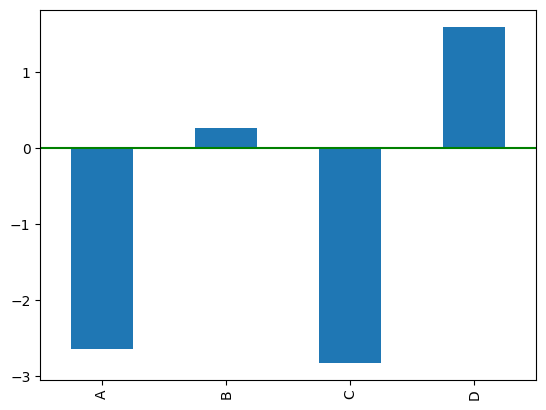

In [ ]:
plt.figure()
df.iloc[5].plot(kind="bar")
plt.axhline(0, color="g")

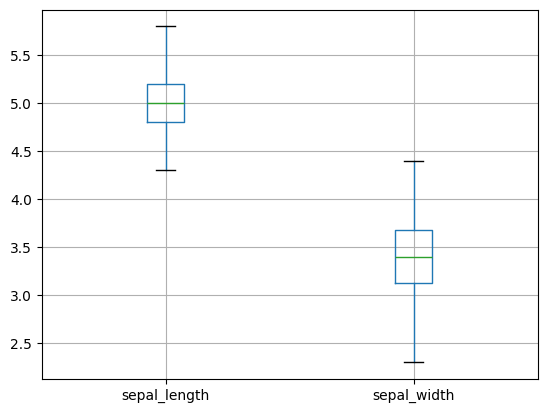

In [ ]:
# data = pd.read_csv('./data/iris.csv')
ax = (
    iris_data.groupby("species")
    .get_group("setosa")
    .boxplot(column=["sepal_length", "sepal_width"], return_type="axes")
)

[Chart Visualization in Pandas](https://pandas.pydata.org/docs/user_guide/visualization.html)

In [ ]:
# another data visualization libaray
import seaborn

https://seaborn.pydata.org/